# Data Exploration

In this file, we will explore the image data from Kaggle competition [State Farm Distracted Driver Detection](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data). 

The dataset contains three files
- `imgs.zip`: zipped folder of all (train/test) images
- `sample_submission.csv`: a sample submission file in the correct format
- `driver_imgs_list.csv`: a list of training images, their subject (driver) id, and class id

We first unzip the file `imgs.zip` to obtain the raw image data.

In [3]:
import zipfile
import os
from tqdm import tqdm

In [ ]:
with zipfile.ZipFile('imgs.zip', 'r') as f:
    if not os.path.exists('train') or not os.path.exists('test'):
        for i in tqdm(range(len(f.infolist()))):
            f.extract(f.infolist()[i])
    else:
        print('The dataset has been unzipped.')

We can use `driver_imgs_list.csv` to check if all files is unzipped. 

In [2]:
import pandas as pd
import numpy as np

In [4]:
imgs_list = pd.read_csv('../driver_imgs_list.csv')
paths_list = []
miss_files = []
for i in range(len(imgs_list)):
    path = '../dataset_original/train/'+imgs_list.iloc[i]['classname']+'/'+imgs_list.iloc[i]['img']
    paths_list.append(path)
    if not os.path.exists(path):
        miss_files.append(path)
if len(miss_files) == 0:
    print('No file is missing. There are {} training images.'.format(len(imgs_list)))
else:
    print('The following files are missing:\n')
    print(miss_files)

No file is missing. There are 22424 training images.


In [5]:
import pandas as pd

submit_samples = pd.read_csv('../sample_submission.csv')
submit_samples.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


## basic statistics of the data

In [6]:
# function to get the list of paths in a directory
def get_paths(root):
    paths = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            paths.append(os.path.join(path, name))
    return paths

image number of test set

In [8]:
test_paths = get_paths('../dataset_original/test')
print('There are {} images in the test set.'.format(len(test_paths)))

There are 79726 images in the test set.


the number of drivers and drivers' names

In [9]:
subj = np.unique(imgs_list['subject'])
print('There are {} drivers.'.format(len(subj)))
print(subj)

There are 26 drivers.
['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']


count image numbers for each drivers

In [10]:
subj_count = {}
for sub in subj:
    subj_count[sub] = len(imgs_list[imgs_list['subject']==sub])

print(subj_count)

{'p002': 725, 'p012': 823, 'p014': 876, 'p015': 875, 'p016': 1078, 'p021': 1237, 'p022': 1233, 'p024': 1226, 'p026': 1196, 'p035': 848, 'p039': 651, 'p041': 605, 'p042': 591, 'p045': 724, 'p047': 835, 'p049': 1011, 'p050': 790, 'p051': 920, 'p052': 740, 'p056': 794, 'p061': 809, 'p064': 820, 'p066': 1034, 'p072': 346, 'p075': 814, 'p081': 823}


number of classes

In [11]:
cls_name = np.unique(imgs_list['classname'])
print('There are {} classes.'.format(len(cls_name)))
print(cls_name)

There are 10 classes.
['c0' 'c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'c9']


image numbers for each class

In [12]:
cls_count = {}
for cls in cls_name:
    cls_count[cls] = len(imgs_list[imgs_list['classname']==cls])

print(cls_count)

{'c0': 2489, 'c1': 2267, 'c2': 2317, 'c3': 2346, 'c4': 2326, 'c5': 2312, 'c6': 2325, 'c7': 2002, 'c8': 1911, 'c9': 2129}


In [16]:
columns = ['drivers'] + list(cls_name) + ['total']

In [19]:
df = []
for sub in subj:
    row = [sub]
    for cls in cls_name:
        num = len(imgs_list[(imgs_list['subject']==sub) & (imgs_list['classname']==cls)])
        row.append(num)
    row.append(subj_count[sub])
    df.append(row)
df = pd.DataFrame(df, columns=columns)

In [20]:
df.head()

,drivers,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,total
0,p002,76,74,86,79,84,76,83,72,44,51,725
1,p012,84,95,91,89,97,96,75,72,62,62,823
2,p014,100,103,100,100,103,102,101,77,38,52,876
3,p015,79,85,88,94,101,101,99,81,86,61,875
4,p016,111,102,101,128,104,104,108,101,99,120,1078


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

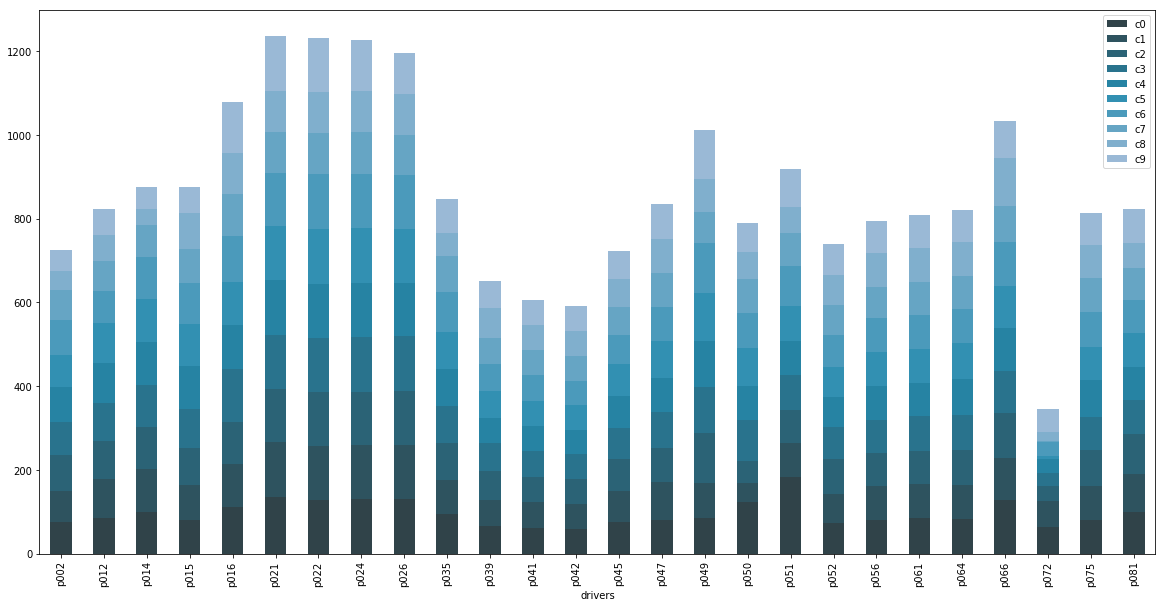

In [33]:
with sns.color_palette("PuBuGn_d", 10):
    df.plot.bar(x='drivers', y=list(cls_name), stacked=True, figsize=(20, 10))

In [53]:
from skimage.io import imread, imshow, imsave
from matplotlib.pyplot import figure, axis

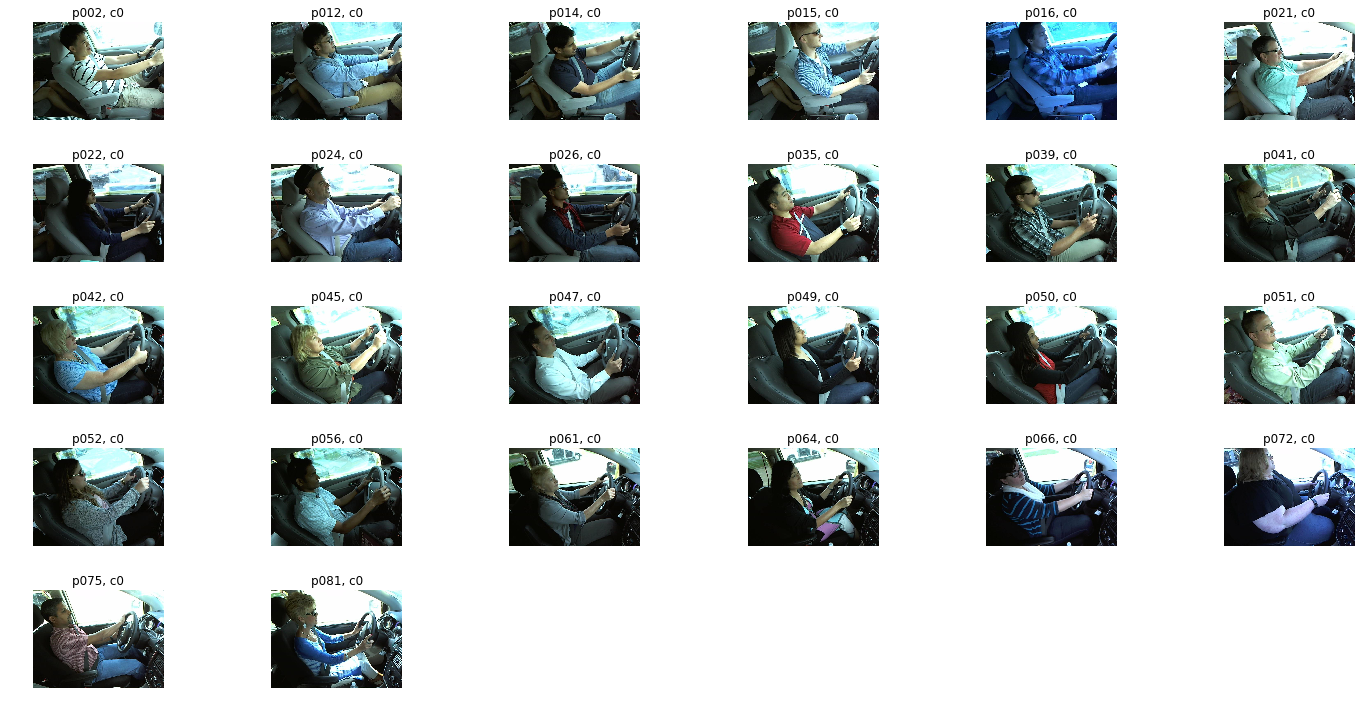

In [49]:
fig = figure(figsize=(20, 10))
for i in range(len(subj)):
    sub = subj[i]
    img_sample = imgs_list[imgs_list['subject']==sub].iloc[0]
    classname = img_sample['classname']
    name = img_sample['img']
    path = '../dataset_original/train/'+classname+'/'+name
    a = fig.add_subplot(5, 6, i+1)
    a.title.set_text(sub+', '+classname)
    image = imread(path)
    imshow(image)
    axis('off')

The size of the image

In [50]:
import cv2

In [51]:
img_sample = cv2.imread(paths_list[0])
img_sample.shape

(480, 640, 3)

Show the sample image

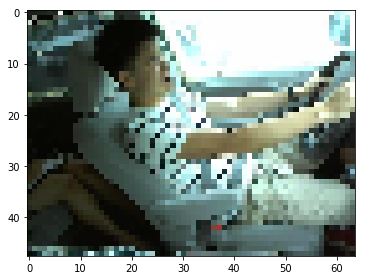

In [52]:
img_sample = cv2.cvtColor(img_sample, cv2.COLOR_BGR2RGB)
img_sample = cv2.resize(img_sample, (64, 48))
imshow(img_sample)

resize images in order to perform the nearest neighbor

In [66]:
for cls in cls_name:
    for path in paths_list:
        if cls in path:
            img_name = os.path.basename(path)
            img = imread(path)
            img = cv2.resize(img, (64, 48))
            save_path = '../dataset_resized/train/'+cls
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            imsave(save_path+'/'+img_name, img, quality=75)    

In [67]:
for path in test_paths:
    img_name = os.path.basename(path)
    img = imread(path)
    img = cv2.resize(img, (64, 48))
    save_path = '../dataset_resized/test'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    imsave(save_path+'/'+img_name, img, quality=75)    

C:\Users\mingy\Anaconda3\envs\tf\lib\site-packages\skimage\io\_io.py:132: UserWarning: ../dataset_resized/test/img_32463.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\mingy\Anaconda3\envs\tf\lib\site-packages\skimage\io\_io.py:132: UserWarning: ../dataset_resized/test/img_77655.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\mingy\Anaconda3\envs\tf\lib\site-packages\skimage\io\_io.py:132: UserWarning: ../dataset_resized/test/img_79591.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


Interestingly, we find that there are three images in the testset is pure black...

(-0.5, 63.5, 47.5, -0.5)

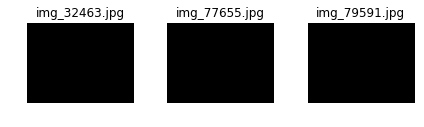

In [69]:
fig = figure()
path1 = '../dataset_resized/test/img_32463.jpg'
path2 = '../dataset_resized/test/img_77655.jpg'
path3 = '../dataset_resized/test/img_79591.jpg'
a1 = fig.add_subplot(1, 3, 1)
a1.title.set_text('img_32463.jpg')
imshow(imread(path1))
axis('off')
a2 = fig.add_subplot(1, 3, 2)
a2.title.set_text('img_77655.jpg')
imshow(imread(path2))
axis('off')
a3 = fig.add_subplot(1, 3, 3)
a3.title.set_text('img_79591.jpg')
imshow(imread(path3))
axis('off')

## animation of the data

In [13]:
import cv2
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline  

In [10]:
for i in tqdm(range(len(subj))):
# for s in subj:
    s = subj[i]
    ss = imgs_list[imgs_list['subject']==s]
    frames = []
    # for j in tqdm(range(len(ss.values))):
    for f in ss.values:
        # f = ss.values[j]
        frame = cv2.imread('train/'+f[1]+'/'+f[2])
        frame = cv2.resize(frame, (160, 120))
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)
    if not os.path.exists('gifs'):
        os.makedirs('gifs')
    imageio.mimsave('gifs/'+s+'_moive.gif', frames, duration=0.1)

100%|██████████| 26/26 [14:04<00:00, 29.10s/it]


## nearest neighbor

In [14]:
from skimage.io import imread, imshow

ordering the imgs_list such that the list is ordered first by subjects then by classname.

In [70]:
df = []
for s in subj:
    for c in cls_name:
        sc_df = imgs_list[(imgs_list['subject']==s) & (imgs_list['classname']==c)]
        if len(df)!=0:
            df = pd.concat([df, sc_df], ignore_index=True)
        else:
            df = sc_df

In [93]:
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [78]:
path = '../dataset_resized/train/'+df.iloc[0]['classname']+'/'+df.iloc[0]['img']
img = imread(path)
img = img.flatten()
img.shape

(9216,)

In [79]:
img_p002 = []
df_p002 = df[df.subject=='p002']
for i in range(len(df_p002)):
    path = '../dataset_resized/train/'+df_p002.iloc[i]['classname']+'/'+df_p002.iloc[i]['img']
    img = list(imread(path).flatten())
    img_p002.append(img)
img_p002 = np.array(img_p002)
img_p002.shape

(725, 9216)

In [80]:
from scipy.spatial.distance import pdist, squareform

In [81]:
sq_dists = squareform(pdist(img_p002))
sq_dists.shape

(725, 725)

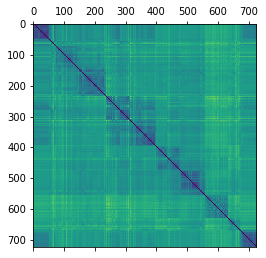

In [82]:
plt.matshow(sq_dists)
plt.show()

In [83]:
from sklearn.neighbors import NearestNeighbors

In [100]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(img_p002)
distances, indices = nbrs.kneighbors(img_p002)

In [101]:
cls_to_num = {}
for i in range(len(cls_name)):
    cls_to_num[cls_name[i]] = i

In [102]:
cls_to_num

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

In [115]:
indices = pd.DataFrame(indices)
indx = indices.applymap(lambda x: cls_to_num[df_p002.iloc[x]['classname']])

In [118]:
np.sum(indx[0]==indx[1])

725

In [120]:
accuracy = np.sum(indx[0]==indx[1])/len(indx)
accuracy

1.0

In [ ]:
ind_to_cls = {}
for i in range(len(df_p002)):
    ind_to_cls['c']

In [85]:
indices

array([[  0,   1,   2,   3,   4],
       [  1,   2,   0,   3,   4],
       [  2,   1,   4,   3,   5],
       ..., 
       [722, 723, 720, 719, 721],
       [723, 719, 722, 720, 702],
       [724, 677, 674, 675, 676]], dtype=int64)

In [99]:
distances[:100]

array([[    0.        ,  2212.06622866,  2606.11492456,  3256.49289881,
         3307.73653727],
       [    0.        ,  1769.94858682,  2212.06622866,  2650.57408876,
         2657.78742566],
       [    0.        ,  1769.94858682,  1877.59899872,  1895.64896539,
         2082.70425169],
       [    0.        ,  1136.974494  ,  1600.25435478,  1708.50431665,
         1732.25257974],
       [    0.        ,  1136.974494  ,  1267.64151084,  1427.78709898,
         1433.7803179 ],
       [    0.        ,   913.5266827 ,   930.140312  ,  1043.94731668,
         1267.64151084],
       [    0.        ,   689.56217994,   843.20756638,   930.140312  ,
         1182.80006764],
       [    0.        ,   843.20756638,   949.62887488,  1043.94731668,
         1348.21177862],
       [    0.        ,   689.56217994,   913.5266827 ,   949.62887488,
         1107.16665412],
       [    0.        ,  1107.16665412,  1182.80006764,  1337.55112052,
         1360.58480074],
       [    0.        ,  1511.

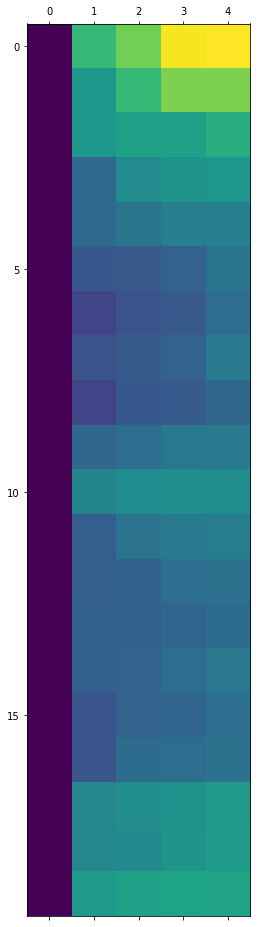

In [98]:
plt.matshow(distances[:20])
plt.show()

In [16]:
def transform_image(img, x, y, to_gray=False):
    resized = cv2.resize(img, (x, y), cv2.INTER_LINEAR)

    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY).astype('float')
    else:
        resized = resized.astype('float')

    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX)
    timg = normalized.reshape(1, np.prod(normalized.shape))

    return timg/np.linalg.norm(timg)

In [17]:
imgs = []
for i in tqdm(range(len(df))):
    path = 'train/'+df.iloc[i]['classname']+'/'+df.iloc[i]['img']
    img = imread(path, as_grey=True)
    img = transform_image(img, 100, 75)
    imgs.append(img)

100%|██████████| 22424/22424 [07:27<00:00, 50.07it/s]


In [18]:
imgs = np.array(imgs).squeeze()
imgs.shape

(22424, 7500)

In [19]:
import h5py
with h5py.File('imgs_gray.h5', 'w') as f:
    f.create_dataset('imgs_gray', data=imgs)

In [7]:
import h5py
with h5py.File('imgs_gray.h5', 'r') as f:
    imgs = f['imgs_gray'][:]

imgs.shape

(22424, 7500)

In [10]:
from scipy.spatial.distance import pdist, squareform

sq_dists = squareform(pdist(imgs))
sq_dists.shape

(22424, 22424)

In [11]:
with h5py.File('imgs_dists.h5', 'w') as f:
    f.create_dataset('imgs_dists', data=sq_dists)

In [12]:
import h5py
with h5py.File('imgs_dists.h5', 'r') as f:
    imgs_dists = f['imgs_dists'][:]

imgs_dists.shape

(22424, 22424)

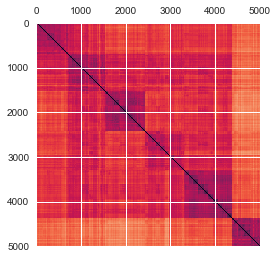

In [16]:
plt.matshow(sq_dists[:5000,:5000])
plt.show()

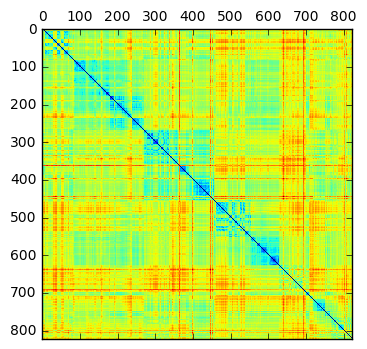

In [32]:
sq_dists = squareform(pdist(imgs[subj_count[subj[0]]:subj_count[subj[0]]+subj_count[subj[1]]]))
plt.matshow(sq_dists)
plt.show()

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns